# London Bike Sharing

Dataset from *https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset*  
  
**Feature** :
- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
  
**"weather_code" category description:**  
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity  
- 2 = scattered clouds / few clouds   
- 3 = Broken clouds   
- 4 = Cloudy   
- 7 = Rain/ light Rain shower/ Light rain   
- 10 = rain with thunderstorm   
- 26 = snowfall   
- 94 = Freezing Fog

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

## Summary

In [2]:
data = pd.read_csv('D:\Data Analytics\Project\london_bike_sharing\london_merged.csv')

In [10]:
data.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,year,month,year_month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,2015,01,2015-01,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,2015,01,2015-01,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,2015,01,2015-01,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,2015,01,2015-01,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,2015,01,2015-01,4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  object        
 8   is_weekend    17414 non-null  object        
 9   season        17414 non-null  object        
 10  date          17414 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


## Cleaning, Fix Type, etc

In [5]:
data[['weather_code', 'is_holiday', 'is_weekend', 'season']] = data[['weather_code', 'is_holiday', 'is_weekend', 'season']].astype('object')

In [6]:
data['date'] = pd.to_datetime(data['timestamp']).dt.date
data['date'] = pd.to_datetime(data.date)
data['timestamp'] = pd.to_datetime(data.timestamp)

In [9]:
data['year'] = data['date'].dt.strftime('%Y')
data['month'] = data['date'].dt.strftime('%m')
data['year_month'] = data['date'].dt.strftime('%Y-%m')
data['hour'] = data['timestamp'].dt.hour

In [11]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
date            0
year            0
month           0
year_month      0
hour            0
dtype: int64

In [13]:
data['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

- 'weather_code', 'is_holiday', 'is_weekend', 'season' adalah object / kategorikal

## EDA

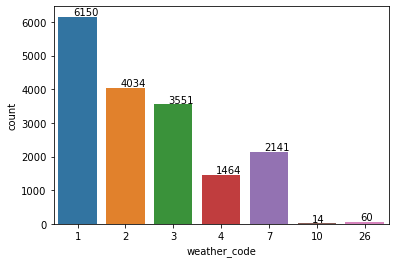

In [58]:
fig,ax = plt.subplots()

sns.countplot(x='weather_code', data =data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+40));

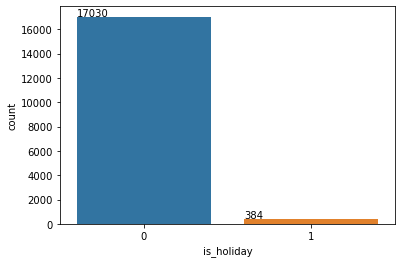

In [64]:
fig,ax = plt.subplots()

sns.countplot(data = data, x='is_holiday')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()+40));

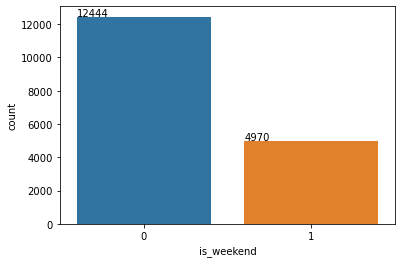

In [65]:
fig,ax = plt.subplots()

sns.countplot(data = data, x='is_weekend')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()+40));

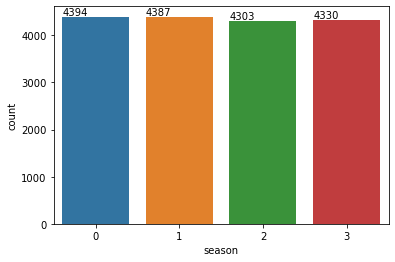

In [66]:
fig,ax = plt.subplots()

sns.countplot(data = data, x='season')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()+40));

- **jauh lebih banyak di hari biasa daripada di holiday**
- **hari biasa lebih ramai dari weekend**
- semua season **konstan**  
  
- **paling banyak** pengguna di cuaca **clear / cerah**, 
- dan **sangat sedikit / hampir tidak ada** di cuaca **badai, salju, dan kabut** 
  
*berarti rata - rata orang menggunakan sepeda disaat **hari biasa / hari kerja saat cuaca cerah**, bukan saat **libur***

In [76]:
data.reset_index(inplace = True)

In [116]:
data

,date,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,year_month,hour
0,2015-01-04,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015,01,2015-01,0
1,2015-01-04,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015,01,2015-01,1
2,2015-01-04,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015,01,2015-01,2
3,2015-01-04,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015,01,2015-01,3
4,2015-01-04,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015,01,2015-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3,0,0,3,2017,01,2017-01,19
17410,2017-01-03,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4,0,0,3,2017,01,2017-01,20
17411,2017-01-03,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4,0,0,3,2017,01,2017-01,21
17412,2017-01-03,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4,0,0,3,2017,01,2017-01,22


<AxesSubplot:xlabel='date', ylabel='cnt'>

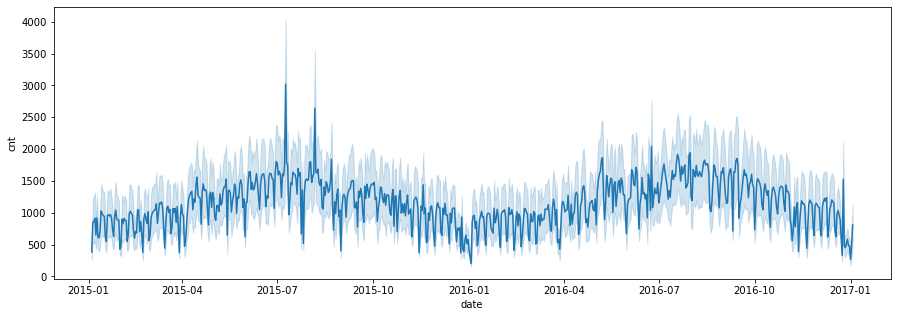

In [83]:
plt.figure(figsize=(15,5))

sns.lineplot(data = data, x = 'date', y = 'cnt')

In [122]:
oty = data.groupby(['year_month']).agg(Total = ('cnt', 'count'))
oty.head

<bound method NDFrame.head of             Total
year_month       
2015-01       671
2015-02       671
2015-03       739
2015-04       719
2015-05       744
2015-06       717
2015-07       740
2015-08       744
2015-09       711
2015-10       736
2015-11       711
2015-12       740
2016-01       744
2016-02       688
2016-03       729
2016-04       719
2016-05       744
2016-06       705
2016-07       741
2016-08       740
2016-09       683
2016-10       743
2016-11       719
2016-12       744
2017-01        72>

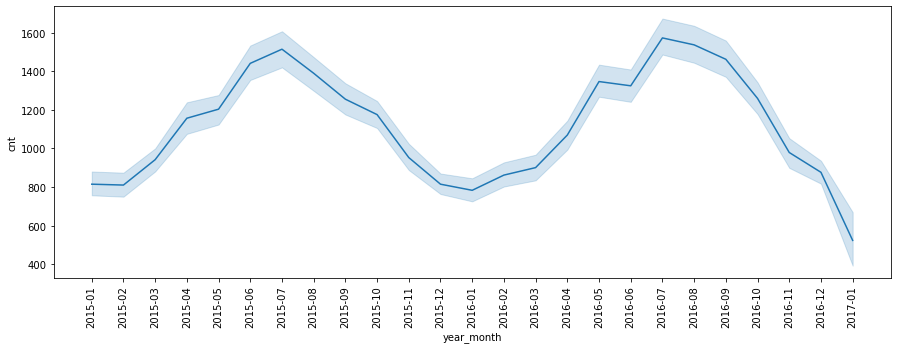

In [109]:
plt.figure(figsize=(15,5))

sns.lineplot(data = data, x = "year_month", y = "cnt")
plt.xticks(rotation = '90');

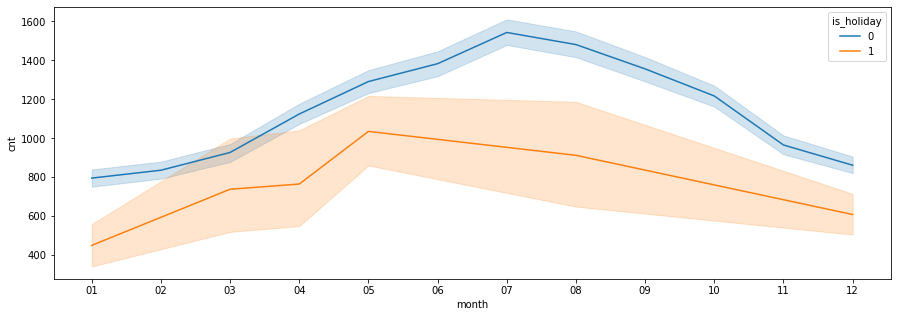

In [120]:
plt.figure(figsize=(15,5))

sns.lineplot(x='month', y='cnt', data = data, hue='is_holiday');

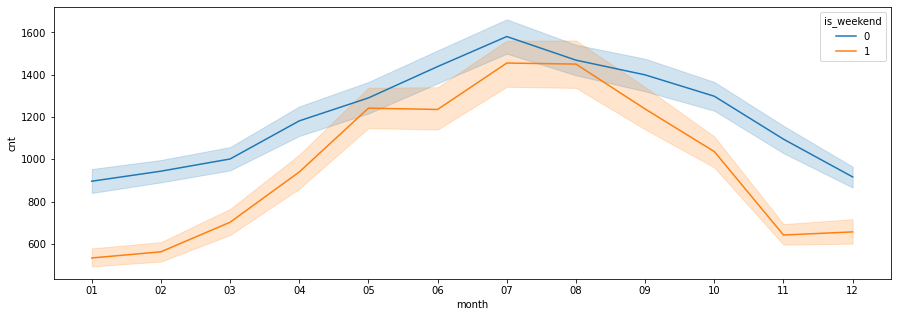

In [121]:
plt.figure(figsize=(15,5))

sns.lineplot(x='month', y='cnt', data = data, hue='is_weekend');

- puncak tiap tahun ada di sekitar bulan juni-juli-agustus, baik hari kerja maupun weekend
- siklus tahunan di akhir-awal tahun akan mengalami penurunan

<AxesSubplot:xlabel='t2', ylabel='cnt'>

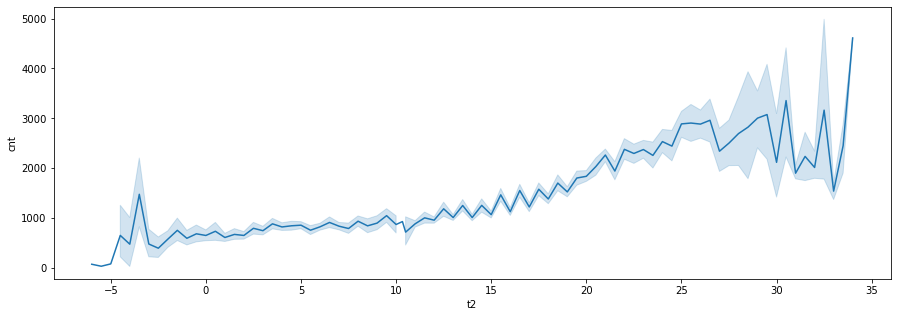

In [22]:
plt.figure(figsize=(15,5))

sns.lineplot(x='t2', y='cnt', data = data)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

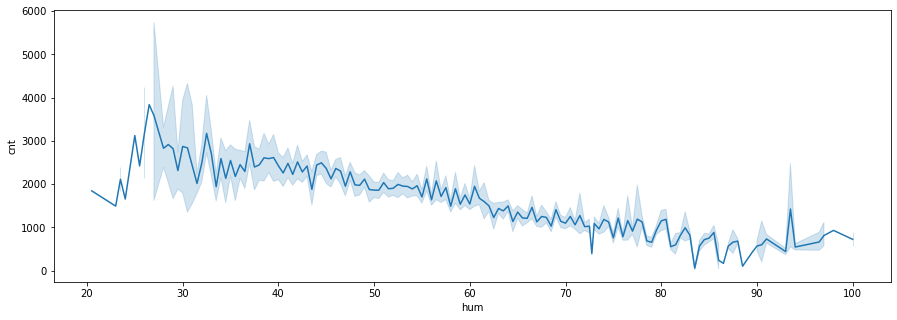

In [23]:
plt.figure(figsize=(15,5))

sns.lineplot(x='hum', y='cnt', data = data)

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

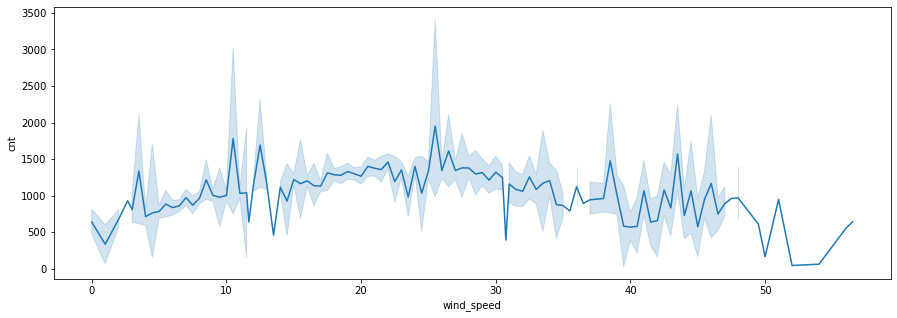

In [25]:
plt.figure(figsize=(15,5))

sns.lineplot(x='wind_speed', y='cnt', data = data)

- paling banyak pengguna di saat suhu terasa 35 derajat / hangat
- semakin tinggi kelembaban semakin jarang orang menggunakan sepede
- kecepatan angin di atas 50 mph, orang sudah mulai berpikir 2x untuk bersepeda

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

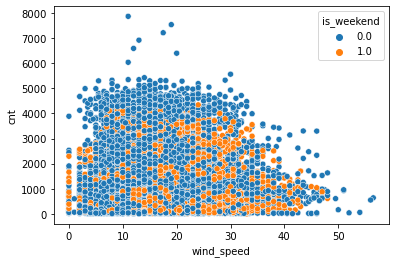

In [28]:
sns.scatterplot(data = data, x = 'wind_speed', y = 'cnt', hue = 'is_weekend')

<AxesSubplot:xlabel='hum', ylabel='cnt'>

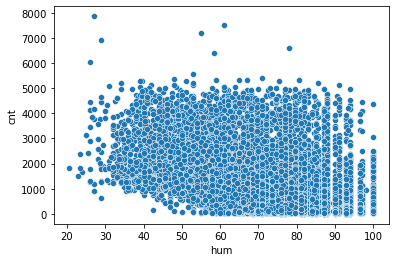

In [17]:
sns.scatterplot(data = data, x = 'hum', y = 'cnt')

<AxesSubplot:xlabel='t2', ylabel='cnt'>

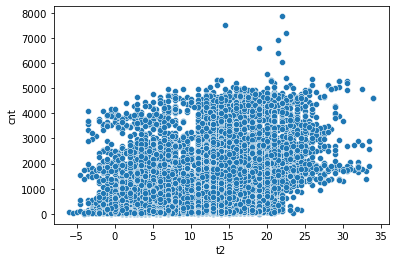

In [19]:
sns.scatterplot(data = data, x = 't2', y = 'cnt')

<AxesSubplot:xlabel='season', ylabel='wind_speed'>

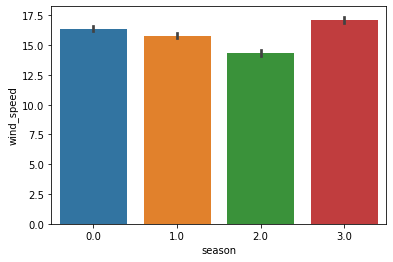

In [22]:
sns.barplot(data = data, x = 'season', y = 'wind_speed')